# Hawk-Dove-Bourgeois Game

In this notebook, we consider the situation where bourgeoises emerge as a new power in Hawk-Dove game.

Bourgeoises behave as follows.

- If they own the land that the food V exists, they behave as a hawk.
- If not, they behave as a dove.
- The probability of owning the land is p.
- The above is equivalent to behaving as a hawk or a dove with the probabilities p and 1-p respectively.
- Bourgeoises don't compete with themselves like doves.

For simplicity, we set p to 0.5 this time.  
The expected payoff that a bourgeois gains when competing with a hawk is 
$$ \frac{V-C}{2} \times p + 0 \times (1 - p) = \frac{V-C}{4} $$
Similarly, we can calculate the expected payoff in the other cases and obtain the following payoff matrix.

| | Hawk | Dove | Bourgeois |
| ---- | ---- | ---- | ---- |
| **Hawk** | $$\frac{V-C}{2}$$ | $$V$$ | $$\frac{3V-C}{4}$$ |
| **Dove** | $$0$$ | $$\frac{V}{2}$$ | $$\frac{V}{4}$$ |
| **Bourgeois** | $$\frac{V-C}{4}$$ | $$\frac{3V}{4}$$ | $$\frac{V}{2}$$ |


In [1]:
# import necessary packages
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### Variable Parameters
- V: the amount of food
- C: cost
- init_distr: initial population distribution of groups (Initial share of each pure strategy)
    - (share of hawk, share of dove, share of bourgeois)
- dt: update interval
- num_iter: the number of iterations

If there are no bourgeoises, the share of each group is stable at $$(s_{hawk}, s_{dove}) = (0.5, 0.5)~~~~(V = 1, C = 2)$$  
What would happen if a part of doves were suddenly transformed into bourgeoises, that is, the share changed to $$(s_{hawk}, s_{dove}, s_{bourgeois}) = (0.5, 0.4, 0.1)$$

In [3]:
# key -> index (H = Hawk, D = Dove, B = Bourgeois)
H = 0
D = 1
B = 2

V = 1
C = 2
p = 0.5

# payoff matrix
A = np.array([
    [(V - C) / 2, V, (V - C) / 2 * p + V * (1 - p)],
    [0, V / 2, V / 2 * (1 - p)],
    [(V - C) / 2 * p, V * p + V / 2 * (1 - p), V / 2]
])
print('*** payoff matrix ***')
groups = ['Hawk', 'Dove', 'Bourgeois']
pprint(pd.DataFrame(A, index=groups, columns=groups))

init_distr = (0.5, 0.4, 0.1)
# assert sum(init_distr) == 1.

dt = 0.1

num_iter = 1000

*** payoff matrix ***
           Hawk  Dove  Bourgeois
Hawk      -0.50  1.00       0.25
Dove       0.00  0.50       0.25
Bourgeois -0.25  0.75       0.50


### Run a simulation

In [4]:
s_h, s_d, s_b = init_distr
log = []
for t in tqdm(range(num_iter)):
    # calculate the payoff that each group gains
    u_h = A[H][H] * s_h + A[H][D] * s_d + A[H][B] * s_b
    u_d = A[D][H] * s_h + A[D][D] * s_d + A[D][B] * s_b
    u_b = A[B][H] * s_h + A[B][D] * s_d + A[B][B] * s_b

    # the average payoff
    avg_u = u_h * s_h + u_d * s_d + u_b * s_b
    
    # update according to replicator dynamics
    d_h = s_h * (u_h - avg_u) * dt
    d_d = s_d * (u_d - avg_u) * dt
    d_b = s_b * (u_b - avg_u) * dt
    s_h += d_h
    s_d += d_d
    s_b += d_b

    log.append((s_h, s_d, s_b))

  0%|          | 0/1000 [00:00<?, ?it/s]

### Plot how each strategy changes
On the default setting, we can see the dominance of a bourgeois strategy.

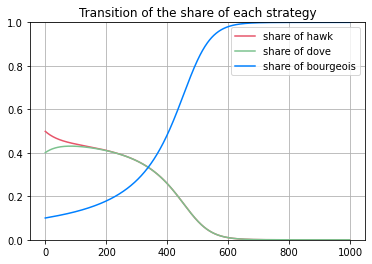

In [5]:
s_h, s_d, s_b = map(lambda x: np.array(list(x)), zip(*log))

plt.plot(s_h, label ='share of hawk', color="#E7556A")
plt.plot(s_d, label ='share of dove', color="#7CC28E")
plt.plot(s_b, label ='share of bourgeois', color="#0080FF")
plt.grid()
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.title('Transition of the share of each strategy')
plt.show()

### Plot how stable each point is
On the default setting, we can see vectors point to the origin.  

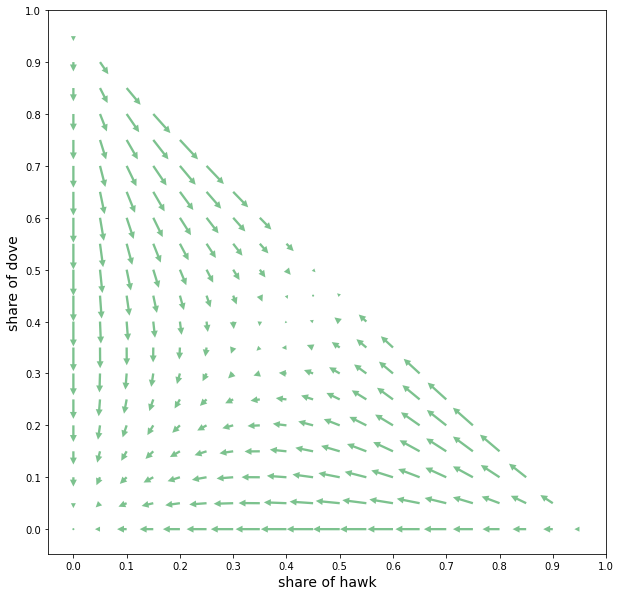

In [6]:
stop = 100
step = 5

log = []
for i in range(0, stop, step):
    for j in range(0, stop - i, step):
        s_h = i / stop
        s_d = j / stop
        s_b = (stop - i - j) / stop
        
        u_h = A[H][H] * s_h + A[H][D] * s_d + A[H][B] * s_b
        u_d = A[D][H] * s_h + A[D][D] * s_d + A[D][B] * s_b
        u_b = A[B][H] * s_h + A[B][D] * s_d + A[B][B] * s_b
        avg_u = u_h * s_h + u_d * s_d + u_b * s_b
        
        d_h = s_h * (u_h - avg_u)
        d_d = s_d * (u_d - avg_u)

        log.append((s_h, s_d, d_h, d_d))
        
s_h, s_d, d_h, d_d = map(list, zip(*log))

fig, ax = plt.subplots(figsize=(10, 10))
q = plt.quiver(s_h, s_d, d_h, d_d, 
               headwidth=3, headlength=3, headaxislength=3, 
               angles='xy', scale=1.25, scale_units='xy', 
               color="#7CC28E")

ax.set_xlabel('share of hawk', fontsize=14)
ax.set_ylabel('share of dove', rotation=90, fontsize=14)
ax.set_xticks(ticks=np.arange(0, 1.1, 0.1))
ax.set_yticks(ticks=np.arange(0, 1.1, 0.1))
plt.show()

### Extra: Rock Paper Scissors
Since the payoff matrix is cyclic, the share of each strategy is also cyclic.

*** payoff matrix ***
          Rock  Paper  Scissors
Rock         0     -1         1
Paper        1      0        -1
Scissors    -1      1         0


  0%|          | 0/1000 [00:00<?, ?it/s]

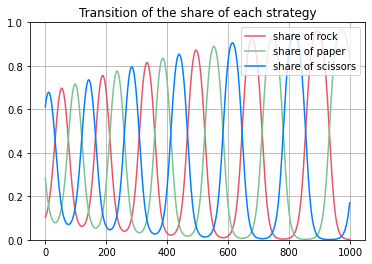

In [7]:
R = 0
P = 1
S = 2

A = np.array([
    [0, -1, 1],
    [1, 0, -1],
    [-1, 1, 0]
])
print('*** payoff matrix ***')
moves = ['Rock', 'Paper', 'Scissors']
pprint(pd.DataFrame(A, index=moves, columns=moves))

init_distr = (0.1, 0.3, 0.6)
# assert sum(init_distr) == 1.

dt = 0.1

num_iter = 1000

s_r, s_p, s_s = init_distr
log = []
for t in tqdm(range(num_iter)):
    u_r = A[R][R] * s_r + A[R][P] * s_p + A[R][S] * s_s
    u_p = A[P][R] * s_r + A[P][P] * s_p + A[P][S] * s_s
    u_s = A[S][R] * s_r + A[S][P] * s_p + A[S][S] * s_s

    avg_u = u_r * s_r + u_p * s_p + u_s * s_s
    
    d_r = s_r * (u_r - avg_u) * dt
    d_p = s_p * (u_p - avg_u) * dt
    d_s = s_s * (u_s - avg_u) * dt
    s_r += d_r
    s_p += d_p
    s_s += d_s
    
    log.append((s_r, s_p, s_s))
    
s_r, s_p, s_s = map(lambda x: np.array(list(x)), zip(*log))

plt.plot(s_r, label ='share of rock', color="#E7556A")
plt.plot(s_p, label ='share of paper', color="#7CC28E")
plt.plot(s_s, label ='share of scissors', color="#0080FF")
plt.grid()
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.title('Transition of the share of each strategy')
plt.show()